## Fisher's Exact Test

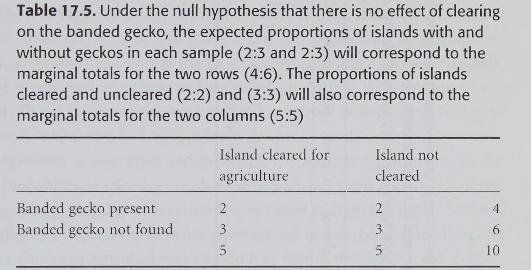

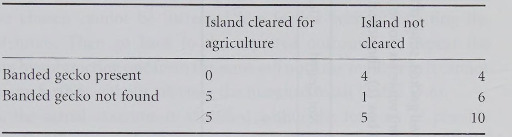

In [14]:
# https://www.pathwaycommons.org/guide/primers/statistics/fishers_exact_test/

In [9]:
from scipy.stats import fisher_exact
import numpy as np

In [56]:
contingency_table = [[0,4],   # Group A: [Success, Failure]
                     [5, 1]]

In [133]:
observed_contingency_table = [[12, 3],   # Group A: [Success, Failure]
                     [3, 12]]

In [134]:
odds_ratio, p_value = fisher_exact(observed_contingency_table)

print(f"Odds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")

Odds Ratio: 16.0
P-value: 0.002814330708742636


In [135]:
grand_total = np.sum(observed_contingency_table)

row_sums = np.sum(observed_contingency_table,1)
col_sums = np.sum(observed_contingency_table,0)

grand_total, row_sums, col_sums

(30, array([15, 15]), array([15, 15]))

In [136]:
exp_contingency_table = [[(row_sums[0] * col_sums[0])/grand_total , (row_sums[0] * col_sums[1])/grand_total],
                         [(row_sums[1] * col_sums[0])/grand_total , (row_sums[1] * col_sums[1])/grand_total]]
np.sum(exp_contingency_table) == grand_total, np.sum(exp_contingency_table,0) == col_sums, np.sum(exp_contingency_table,1) == row_sums

(True, array([ True,  True]), array([ True,  True]))

In [137]:
def generate_contingency_tables(row_totals, column_totals):
    possible_tables = []
    # The range of the top-left cell
    for x in range(max(0, row_totals[0] + column_totals[0] - sum(row_totals)), min(row_totals[0], column_totals[0]) + 1):
        # Calculate other cells based on x
        a11 = x
        a12 = row_totals[0] - a11
        a21 = column_totals[0] - a11
        a22 = row_totals[1] - a21
        
        # Append the table to the list
        table = [[a11, a12], [a21, a22]]
        possible_tables.append(table)
    
    return possible_tables

In [138]:
from math import comb

In [139]:
possible_contingency_tables = generate_contingency_tables(row_sums, col_sums)


7.25321034013437e-05

In [142]:
idx_obs = possible_contingency_tables.index(observed_contingency_table)

In [143]:
ct_probs = []
for ct in possible_contingency_tables:
    a = comb(ct[0][0] + ct[0][1], ct[0][1])
    b = comb(ct[1][0] + ct[1][1], ct[1][1])
    c = comb(np.sum(ct), ct[0][0] + ct[0][1])
    ct_probs.append((a*b)/c)
np.sum(ct_probs)

1.0

In [148]:
prob_event_or_more = np.sum(ct_probs[idx_obs:])
prob_event_or_more, prob_event_or_more*2

(0.001407165354371318, 0.002814330708742636)

0.002814330708742636

In [147]:
prob_event_or_more *2

0.002814330708742636

In [ ]:
np.sum(ct_probs[idx_obs:]) + np.sum(ct_probs[:4])

In [178]:
possible_contingency_tables[:4]

[[[0, 15], [15, 0]],
 [[1, 14], [14, 1]],
 [[2, 13], [13, 2]],
 [[3, 12], [12, 3]]]

0.001407165354371318

In [188]:
np.sum(ct_probs[idx_obs:])

True

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

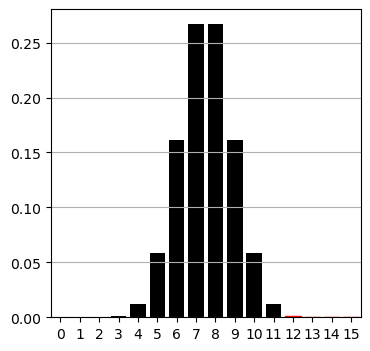

In [167]:
plt.figure(figsize=(4,4))
plt.grid(zorder=-1)
bars = sns.barplot(x=np.arange(len(ct_probs)), y=ct_probs, color='k')

# Loop through the bars and color those with index >= 12 differently
for i, bar in enumerate(bars.patches):
    if i >= idx_obs:
        bar.set_color('red')  # Change 'red' to any color you prefer